# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [2]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Estimation of mean

* Load data
* Make assumptions
* Estimate mean
* Write down confidence interval

In [3]:
!head -n 3 data/NYPowerBall.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import csv
data = []

with open('../data/NYPowerBall.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [5]:
[1,2]+[2,3]

[1, 2, 2, 3]

In [6]:
list_of_lists = [[int(str_number) for str_number in d[1].split(' ')] for d in data]
numbers = sum(list_of_lists,start=[])

In [7]:
len(numbers)

5646

In [8]:
import numpy as np
arr = np.array(list_of_lists)
numbers_arr = arr.flatten()

In [9]:
np.unique(numbers_arr)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])

In [10]:
np.max(numbers_arr)

69

In [11]:
np.min(numbers_arr)

1

### Assumption about data

* Integers between 1 and 69
* We assume that the lotto draws are independent and identically distributed

### What to do

Compute confidence interval using Hoeffdings inequality using the bounds above

Lets say we fix a level $\alpha \in (0,1)$, and solve the equation
$$
    \alpha = 2 e^{-\frac{2n\epsilon^2}{(b-a)^2}}
$$

$$
    \ln(\alpha/2) = -\frac{2n\epsilon^2}{(b-a)^2}
$$

$$
    -(b-a)^2\ln(\alpha/2)/(2n) =\epsilon^2
$$

$$
\sqrt{(b-a)^2\ln(2/\alpha)/(2n)} = \epsilon
$$

In [12]:
def compute_epsilon(alpha,n,a,b):
    return np.sqrt((b-a)**2*np.log(2/alpha)/(2*n))

In [13]:
alpha = 0.05
n = numbers_arr.shape[0]
a = 1
b = 69
delta = compute_epsilon(alpha,n,a,b)
delta

1.2290532787806112

In [14]:
conf_interval = (np.mean(numbers_arr)-delta,np.mean(numbers_arr)+delta)
print("Confidencen interval for the mean is: ",conf_interval)

Confidencen interval for the mean is:  (28.29361763868308, 30.751724196244304)


In [15]:
import Utils

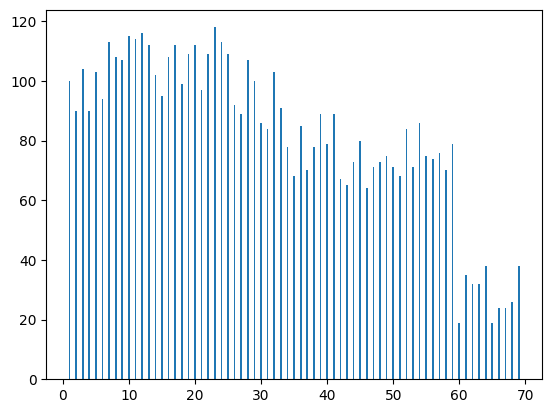

In [16]:
import matplotlib.pyplot as plt
#_=plt.hist(numbers_arr,bins=)
Utils.discrete_histogram(numbers_arr)

# Likelihood of parameter

* Load data
* Work with dates
* Make assumptions
* Write down the Risk
* Split into two parts
* Minimize the risk numerically on train
* Test the risk on test
* Make confidence intervals

In [17]:
!head -n 10 data/earthquakes.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
import csv
data = []

with open('../data/earthquakes.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [19]:
header[2]

'origintime'

In [20]:
data[0][2]

'2018-05-17T12:19:35.516Z'

In [21]:
import datetime
#-05-17T12:19:35.516Z
datetime.datetime.strptime(data[0][2],"%Y-%m-%dT%H:%M:%S.%fZ")

datetime.datetime(2018, 5, 17, 12, 19, 35, 516000)

In [22]:
origin_time = [datetime.datetime.strptime(d[2],"%Y-%m-%dT%H:%M:%S.%fZ") for d in data]

In [23]:
or_time_arr = np.array(origin_time)
sort_time_arr = np.sort(or_time_arr)
time_between_eq=np.diff(sort_time_arr)

In [24]:
time_between_eq_arr = np.array([d.total_seconds() for d in time_between_eq])

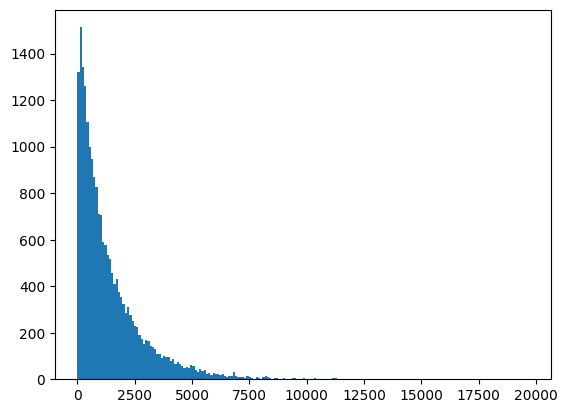

In [25]:
_=plt.hist(time_between_eq_arr,bins=200)

### Assumptions on data

* Exponentially distributed
* Lets also assume that they are IID

The density is given by?
$$
    f(x) = \lambda^\ast e^{-\lambda^\ast x}
$$

$$
    L(f_\lambda,x) = -\ln(f_\lambda(x))
$$

$$
    E[L(f_\lambda,x)] = E[-\ln(f_\lambda(x))]
$$

$$
    \hat R(\lambda) = \frac{1}{n} \sum_{i=1}^n (- \ln(f_\lambda(X_i))
$$

$$
    -\ln(f_\lambda(x)) = -\ln(\lambda) + \lambda x
$$

In [26]:
np.random.shuffle(time_between_eq_arr)
total_n = len(time_between_eq_arr)
train_n = int(total_n*0.5)
test_n = total_n-train_n

train_data, test_data = (time_between_eq_arr[:train_n],time_between_eq_arr[train_n:])

In [27]:
train_data

array([3047.19 , 2690.335, 1831.452, ..., 2884.833, 2412.432,   51.086])

In [28]:
test_data

array([2029.393, 2260.342,  878.429, ...,   53.791,  113.005, 3289.634])

In [29]:
# define the objective/cost/loss function we want to minimise
def empirical_risk_train(l):
    return np.mean(-np.log(l)+l*train_data)

In [30]:
empirical_risk_train(0.001)

8.344515928834618

In [31]:
from scipy import optimize
result = optimize.minimize(empirical_risk_train,0.0001,method='Nelder-Mead')

l_hat = result['x'][0]
l_hat

0.0006950000000000012

In [32]:
1/l_hat

1438.8489208633068

Lets consider the loss
$$
    L(c,x) = |c-x|
$$
The risk then becomes
$$
    R(c) = E[L(c,x)] = E[|c-x|]
$$

So, for our problem, since we have estimated $\hat \lambda$ we can test it as a method of prediction by estimating the following quantity
$$
    E[|1/\hat \lambda - X| \mid \hat \lambda]
$$

We could use our testing data to estimate the above, i.e.
$$
    \frac{1}{n_{test}} \sum_{X_i \in \text{ testing data}} |1/\hat \lambda - X_i|
$$

In [33]:
np.mean(np.abs(1/l_hat - test_data))

1107.4627118399676

In [34]:
np.mean(np.abs(test_data-np.mean(test_data)))

1109.3196369853397

# Logistic Regression

* Load the data
* Separate the data into two parts
* Scale the training data (standard scaling)
* Convert labels to -1 1 for better numerics
* Solve the minimal risk problem
* Tranform the test data with the scaling of the train data
* Test the model
* Confidence interval around prediction

In [35]:
!head -n 10 data/CORIS.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [36]:
# Load data
# Standard scale
# Convert labels to -1,1
# Solve the likelihood problem
data = []



with open('../data/CORIS.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

print(header)
print(data)
data = data[3:]
np.random.shuffle(data)
import pandas as pd

df = pd.DataFrame(data, columns=header)
df

['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
[['last column is chd = Coronary heart Disease = Y'], ['all other columns are potential predictors of Y'], [], ['1', '160', '12.00', ' 5.73', '23.11', '1', '49', '25.30', ' 97.20', '52', '1'], ['2', '144', ' 0.01', ' 4.41', '28.61', '0', '55', '28.87', '  2.06', '63', '1'], ['3', '118', ' 0.08', ' 3.48', '32.28', '1', '52', '29.14', '  3.81', '46', '0'], ['4', '170', ' 7.50', ' 6.41', '38.03', '1', '51', '31.99', ' 24.26', '58', '1'], ['5', '134', '13.60', ' 3.50', '27.78', '1', '60', '25.99', ' 57.34', '49', '1'], ['6', '132', ' 6.20', ' 6.47', '36.21', '1', '62', '30.77', ' 14.14', '45', '0'], ['7', '142', ' 4.05', ' 3.38', '16.20', '0', '59', '20.81', '  2.62', '38', '0'], ['8', '114', ' 4.08', ' 4.59', '14.60', '1', '62', '23.11', '  6.72', '58', '1'], ['9', '114', ' 0.00', ' 3.83', '19.40', '1', '49', '24.86', '  2.49', '29', '0'], ['10', '132', ' 0.00', ' 5.80', '30.96', '1

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,172,118,0.75,2.58,20.25,0,59,24.46,0.00,32,0
1,185,116,8.00,6.73,28.81,1,41,26.74,40.94,48,1
2,360,132,4.05,5.15,26.51,1,31,26.67,16.30,50,0
3,57,118,0.00,2.99,16.17,0,49,23.83,3.22,28,0
4,16,117,1.53,2.44,28.95,1,35,25.89,30.03,46,0
...,...,...,...,...,...,...,...,...,...,...,...
457,138,128,0.50,3.70,12.81,1,66,21.25,22.73,28,0
458,108,170,7.60,5.50,37.83,1,42,37.41,6.17,54,1
459,400,126,8.75,6.06,32.72,1,33,27.00,62.43,55,1
460,278,174,2.02,6.57,31.90,1,50,28.75,11.83,64,1


In [37]:
x, y = df.loc[:, ~df.columns.isin(['chd'])], df.loc[:, df.columns.isin(['chd'])]['chd'].astype(int)
y = y.replace({0: -1})


x_train, y_train = x.iloc[int(np.floor(len(x)*0.7)):], y.iloc[int(np.floor(len(y)*0.7)):]
x_test, y_test = x.iloc[:int(np.floor(len(x)*0.7))], y.iloc[:int(np.floor(len(y)*0.7))]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

x_train.shape


(139, 10)

In [51]:
f = lambda theta: np.sum(np.log(1/(1+np.exp(-y_train.T@x_train@theta))))
theta = np.ones(shape=(10))

In [56]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
#def f(x):
#   return np.sum(np.log(1+np.exp(-Y1*(x[0] + x[1]*X_sc[:,9]))))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-10, 2), (-10, 2)) # specify the constraints for each parameter
initial_arguments = np.(shape=(10)) # point in 2D to initialise the minimize algorithm
result = optimize.minimize(f, initial_arguments) # just call the minimize method!
result

SyntaxError: invalid syntax (828905760.py, line 13)